In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Endereço dos arquivos
folder = ("./dados/hackaton/")

# Cicatrizes auditadas que estão próximas às linhas de transmissão
# ano 2018 - fonte: queimadas
filename_conhecimento = (folder + "cicatrizes/df_conhecimento")
known_cic = gpd.read_file(filename_conhecimento+".shp")

# Cicatrizes auditadas pelo novo método (não publicado) baseado em focos dos satélites de referência 
# ano 2018 - fonte: queimadas
filename_evento = (folder + "cicatrizes/conhecimento_evento")
event_cic = gpd.read_file(filename_evento+".shp")

# Conjunto de focos dos satélites Aqua, Terra e NPP. 
# ano 2018 - fonte: queimadas
filename_focos = (folder + "Focos/Focos.2018-01-01.2018-12-31")
focos = gpd.read_file(filename_focos+".shp")

In [3]:
unidades_fed = gpd.read_file("./dados/br_unidades_da_federacao/BRUFE250GC_SIR.shp")

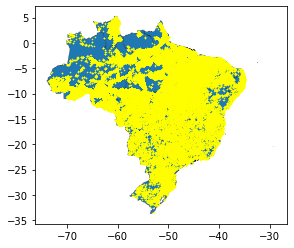

In [4]:
base = unidades_fed.plot(color=None,edgecolor='black',linewidth = 0.2)
known_cic.plot(ax=base, color='red')
event_cic.plot(ax=base, color='green')
focos.plot(ax=base, color='yellow',  markersize=0.3)

In [5]:
N = ["Amazonas", "Roraima", "Amapa", "Para", "Tocantins", "Rondonia", "Acre"]
NE = ["Maranhao", "Piaui", "Ceara", "Rio Grande do Norte", "Pernambuco", "Paraiba", "Sergipe", "Alagoas", "Bahia"]
CO = ["Mato Grosso", "Mato Grosso do Sul", "Goias", "Distrito Federal"]
SE = ["Sao Paulo", "Rio de Janeiro", "Espirito Santo", "Minas Gerais"]
S = ["Parana", "Rio Grande do Sul", "Santa Catarina"]

regioes = {
    "N":  [k.upper() for k in N],
    "NE": [k.upper() for k in NE],
    "CO": [k.upper() for k in CO],
    "SE": [k.upper() for k in SE],
    "S":  [k.upper() for k in S],
}

In [6]:
focos.head()

,DataHora,Satelite,Pais,Estado,Municipi,Bioma,DiaSemCh,Precipit,RiscoFog,Latitude,Longitud,AreaIndu,FRP,geometry
0,2018/01/01 16:10:00,AQUA_M-T,Brasil,BAHIA,CORRENTINA,Cerrado,0,6.75,0.27,-13.226,-44.977,None,42.7,POINT (-44.977 -13.226)
1,2018/01/01 16:10:00,AQUA_M-T,Brasil,BAHIA,PRADO,Mata Atlantica,0,4.43,0.01,-17.359,-39.302,None,6.8,POINT (-39.302 -17.359)
2,2018/01/01 16:10:00,AQUA_M-T,Brasil,MINAS GERAIS,TAIOBEIRAS,Cerrado,0,13.05,0.01,-15.698,-42.029,None,12.5,POINT (-42.029 -15.698)
3,2018/01/01 16:15:00,AQUA_M-T,Brasil,MARANHAO,ALTO ALEGRE DO PINDARE,Amazonia,0,0.00,0.04,-4.058,-46.177,None,96.7,POINT (-46.177 -4.058)
4,2018/01/01 16:15:00,AQUA_M-T,Brasil,ALAGOAS,CORURIPE,Mata Atlantica,0,0.00,1.00,-10.149,-36.348,None,18.2,POINT (-36.348 -10.149)


In [7]:
for r in regioes:
    print(r)

N
NE
CO
SE
S


In [8]:
dados = focos[["DiaSemCh", "Precipit", "RiscoFog", "FRP", "Estado", "Bioma","DataHora"]] #.sample(2500, random_state=1)

In [9]:
def estado_regiao(row):
    for r in regioes:
        if row["Estado"] in regioes[r]:
            return r
    return "NADA"

In [10]:
dados["Regiao"] = dados.apply(estado_regiao, axis=1)

/home/vconrado/anaconda3/envs/hackathon/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
dados[dados["Regiao"] == "NADA"]

,DiaSemCh,Precipit,RiscoFog,FRP,Estado,Bioma,DataHora,Regiao


In [12]:
# importando e configurando módulos de plotagem

fig_size = (16,5)
N=500

siglas = ["N", "NE", "CO", "SE", "S"]
titulos = ["Norte", "Nordeste", "Centro-Oeste", "Sudeste", "Sul"]


palette=sns.diverging_palette(240, 10,  as_cmap=True)

In [13]:
# Separando dados por estação

# períodos das estacoes no hemisfério sul
primavera = (dados['DataHora'] > '2018-09-23') & (dados['DataHora'] <= '2018-12-21')
verao = (dados['DataHora'] > '2018-12-21') | ( (dados['DataHora'] >= '2018-01-01') & (dados['DataHora'] < '2018-03-21') )
outono = (dados['DataHora'] > '2018-03-21') & (dados['DataHora'] <= '2018-06-20')
inverno = (dados['DataHora'] > '2018-06-20') & (dados['DataHora'] <= '2018-09-23')

# Criando coluna estacao
dados['estacao']=''
dados.loc[primavera, 'estacao']="primavera"
dados.loc[verao, 'estacao']="verao"
dados.loc[outono,'estacao']="outono"
dados.loc[inverno, 'estacao']='inverno'


/home/vconrado/anaconda3/envs/hackathon/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/vconrado/anaconda3/envs/hackathon/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [14]:
dados.groupby("Regiao").size()

Regiao
CO    23610
N     62029
NE    33591
S      5543
SE     8099
dtype: int64

In [15]:
dados.groupby("Bioma").size()

Bioma
Amazonia          68345
Caatinga          11347
Cerrado           39449
Mata Atlantica    11298
Pampa               742
Pantanal           1691
dtype: int64

(4.0, 0)

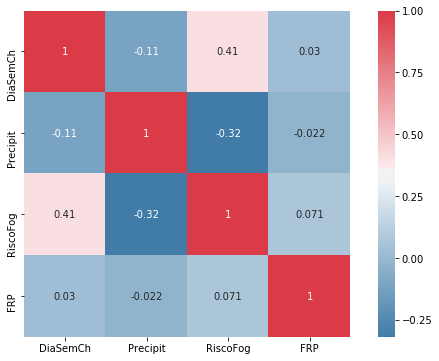

In [16]:
# Gerando matrix de correlação
f, ax = plt.subplots(figsize=(10, 6))
corr = dados.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=palette, 
            square=True, ax=ax, annot=True)
ax.set_ylim(4.0, 0)

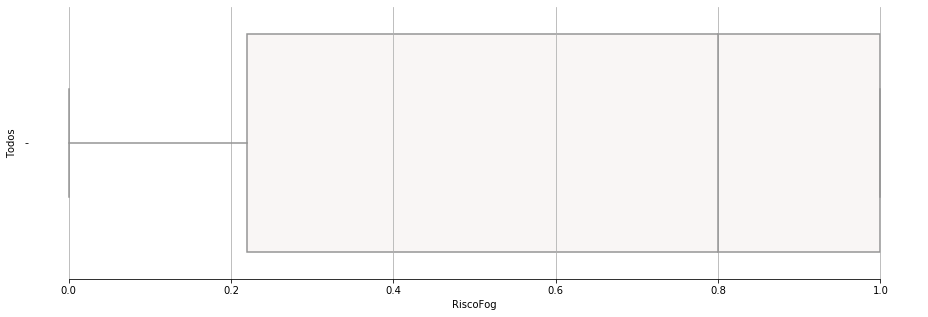

In [17]:
# Boxplot de todos os dados
fig, ax = plt.subplots(figsize=fig_size)
sns.boxplot(ax=ax, x="RiscoFog", data=dados, palette="vlag")
#sns.swarmplot(x="RiscoFog", data=dados, size=2, color=".3", linewidth=0)
ax.xaxis.grid(True) 
ax.set(ylabel="Todos")
sns.despine(trim=True, left=True)

In [18]:
# Pegando dados por regiao

d = []
for r in dados["Regiao"].unique():
    d.append(dados[dados["Regiao"] == r].sample(N,random_state=1))
dados_regiao = pd.concat(d)

In [19]:
dados_regiao.groupby("Regiao").size()

Regiao
CO    500
N     500
NE    500
S     500
SE    500
dtype: int64

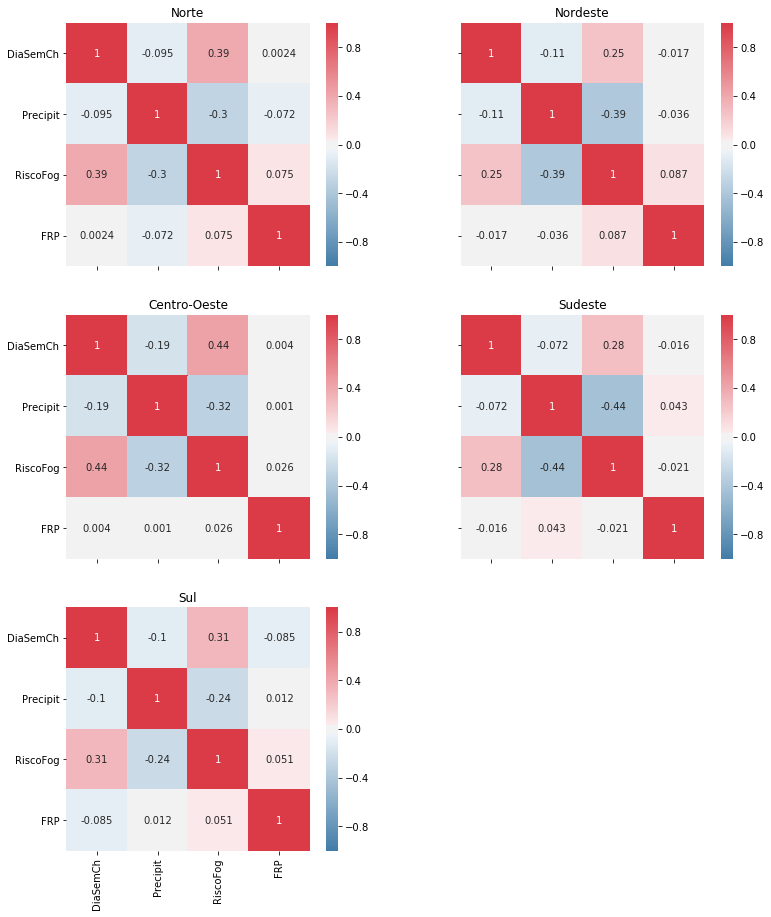

In [20]:
# Gerando matrix de correlação para cada região

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharex=True, sharey=True)
ax = [ax1, ax2, ax3, ax4, ax5, ax6]

for i in range(0, 5):
    corr = dados_regiao[dados_regiao['Regiao'] == siglas[i]].corr()
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=palette, 
                square=True, ax=ax[i], annot=True, vmin=-1, vmax=1)
    ax[i].set_title(titulos[i])
    ax[i].set_ylim(4.0, 0)


ax6.set_visible(False)
plt.subplots_adjust(hspace=0.2, top=3, right=1.8)

/home/vconrado/anaconda3/envs/hackathon/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/vconrado/anaconda3/envs/hackathon/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


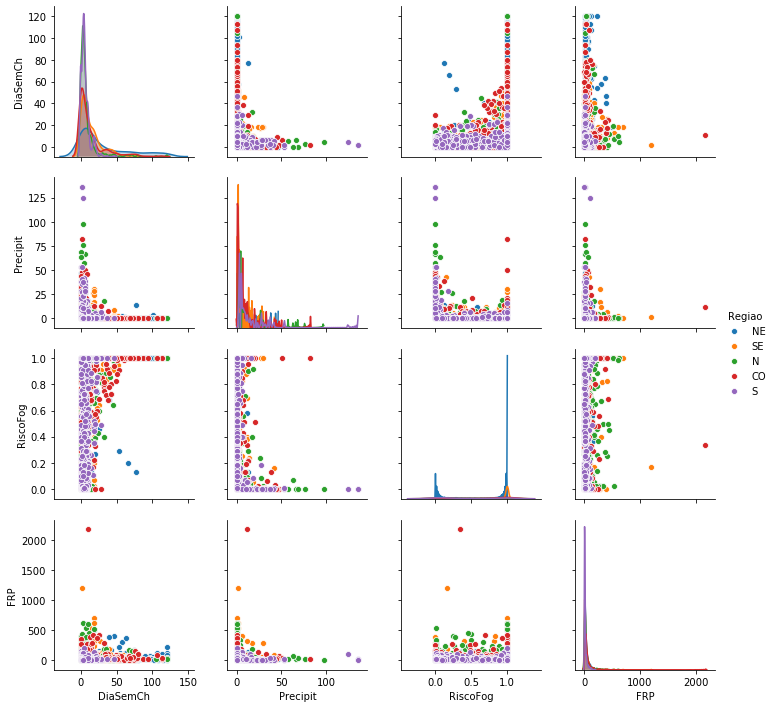

In [21]:
# Gerando scatterplot matrix por região
sns.pairplot(dados_regiao, hue="Regiao")

/home/vconrado/anaconda3/envs/hackathon/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/vconrado/anaconda3/envs/hackathon/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


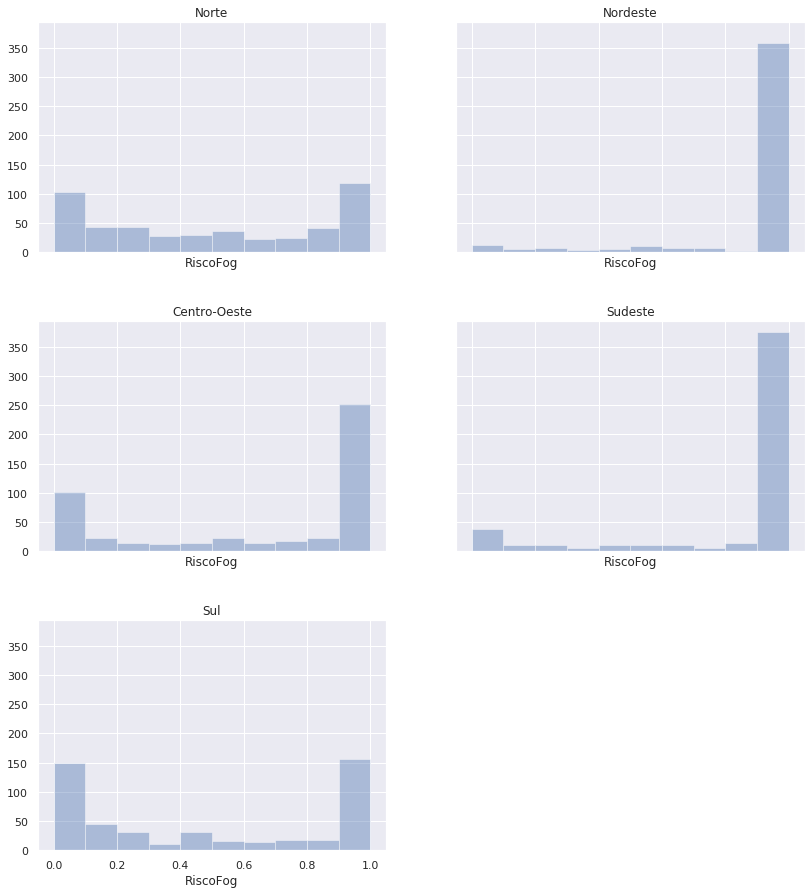

In [22]:
# Histogramas para cada região
from scipy import stats, integrate
sns.set(color_codes=True)

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharex=True, sharey=True)
ax = [ax1, ax2, ax3, ax4, ax5, ax6]

for i in range(0, 5):
    sns.distplot(dados_regiao[dados_regiao['Regiao'] == siglas[i]]["RiscoFog"], ax=ax[i], kde=False, bins=10);
    ax[i].set_title(titulos[i])

ax6.set_visible(False)
plt.subplots_adjust(hspace=0.3, top=3, right=1.9)

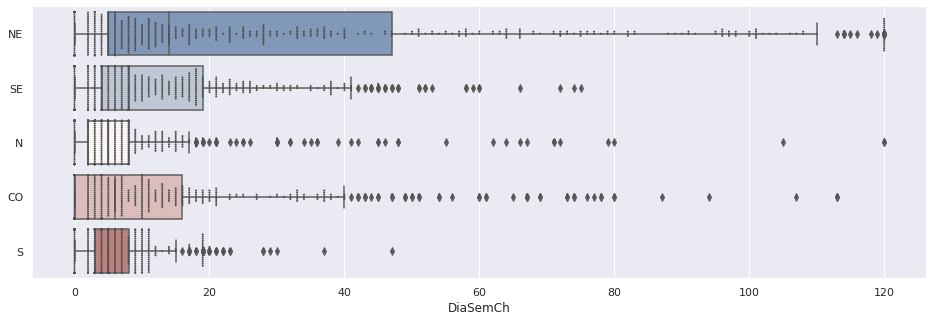

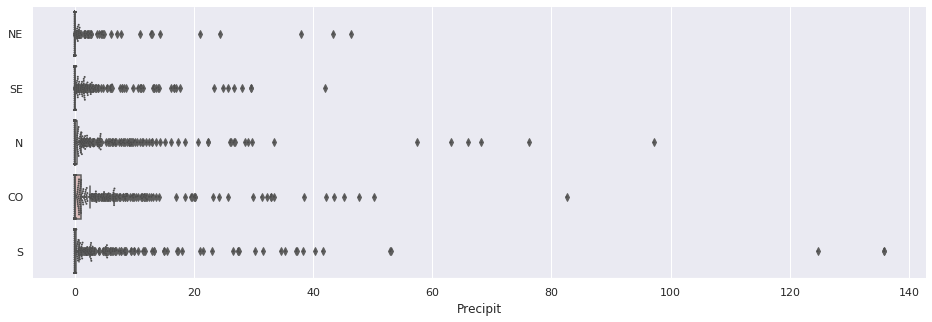

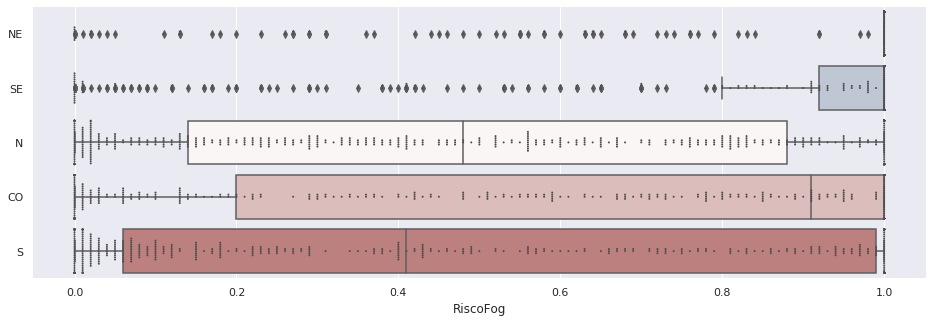

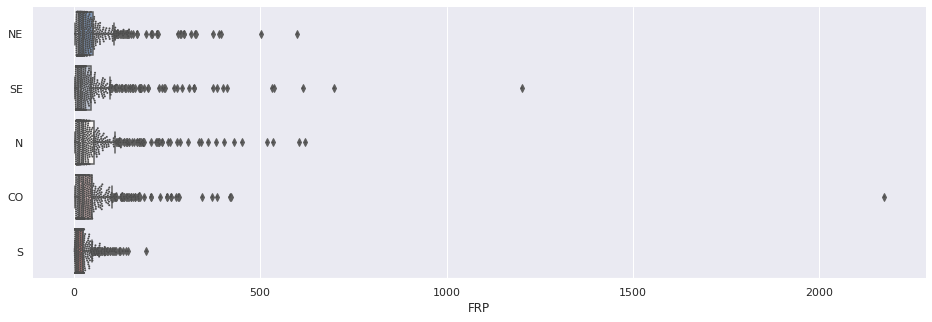

In [23]:
# Gerando boxplot para (risco, temperatura, precipitação, umidade) por região

for var in ["DiaSemCh", "Precipit", "RiscoFog", "FRP"]:
    fig, ax = plt.subplots(figsize=fig_size)
    sns.boxplot(ax=ax, x=var,  y="Regiao", data=dados_regiao, palette="vlag")
    sns.swarmplot(x=var, y="Regiao", data=dados_regiao, size=2, color=".3", linewidth=0)
    ax.xaxis.grid(True)
    ax.set(ylabel="")
    sns.despine(trim=True, left=True)
    ax.set_ylim(4.5, -0.5)

# Bioma

In [36]:
# Pegando dados por bioma

d = []
for r in dados["Bioma"].unique():
    d.append(dados[dados["Bioma"] == r].sample(N,random_state=1))
dados_biomas = pd.concat(d)

In [37]:
dados_biomas.groupby("Bioma").size()

Bioma
Amazonia          500
Caatinga          500
Cerrado           500
Mata Atlantica    500
Pampa             500
Pantanal          500
dtype: int64

In [38]:
biomas = dados["Bioma"].unique()
biomas

array(['Cerrado', 'Mata Atlantica', 'Amazonia', 'Caatinga', 'Pantanal',
       'Pampa'], dtype=object)

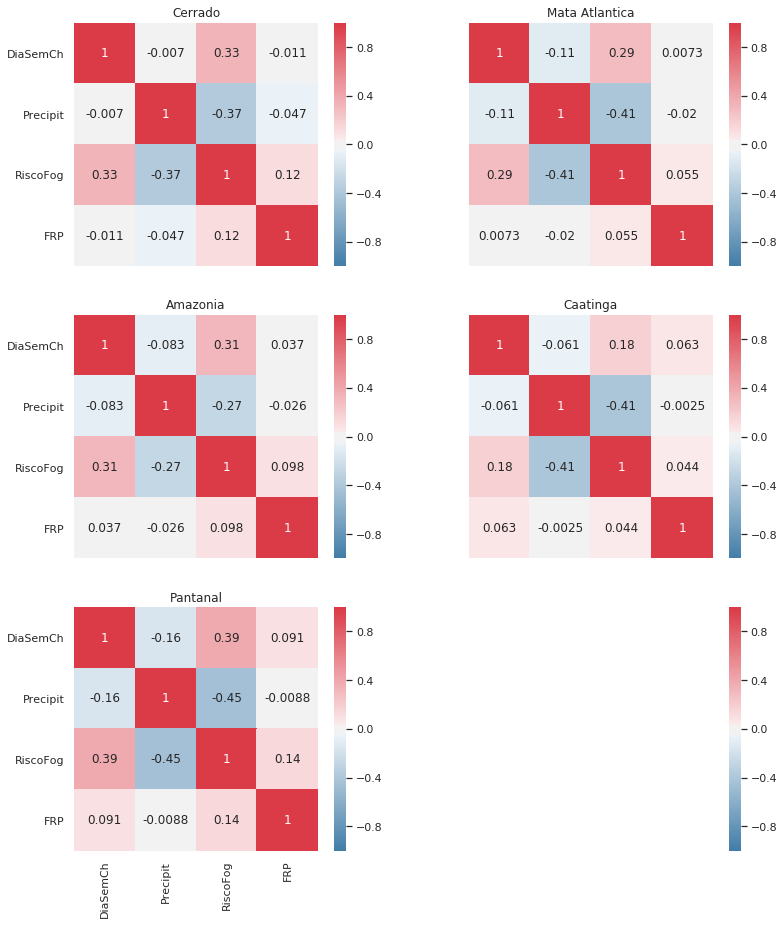

In [39]:
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharex=True, sharey=True)
ax = [ax1, ax2, ax3, ax4, ax5, ax6]
for i in range(0, 6):
    corr = dados_biomas[dados_biomas['Bioma']==biomas[i]].corr()
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=palette, 
                square=True, ax=ax[i], annot=True, vmin=-1, vmax=1)
    ax[i].set_title(biomas[i])
    ax[i].set_ylim(4.0, 0)

ax6.set_visible(False)
plt.subplots_adjust(hspace=0.2, top=3, right=1.8)

/home/vconrado/anaconda3/envs/hackathon/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/vconrado/anaconda3/envs/hackathon/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


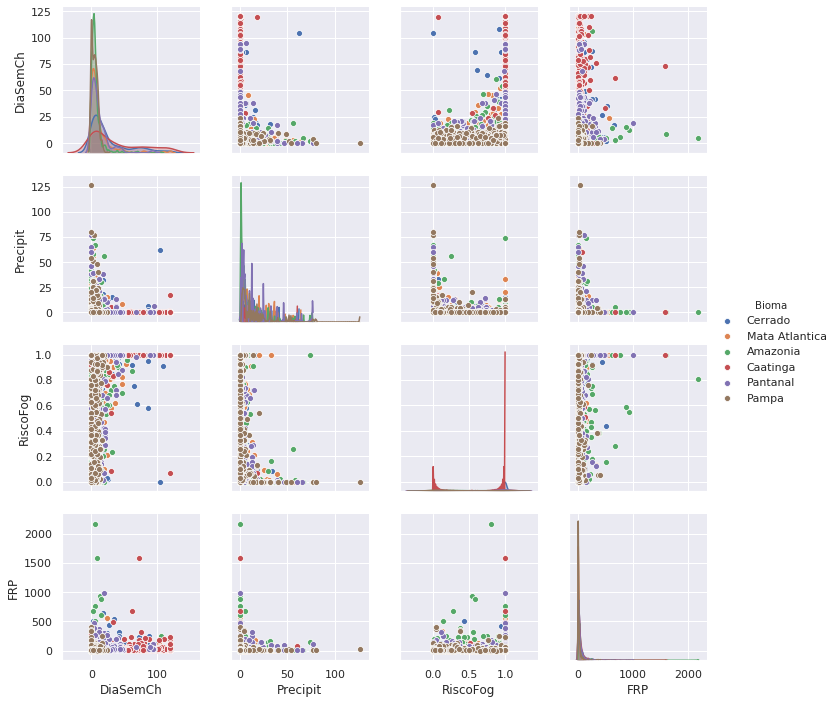

In [40]:
# Gerando scatterplot matrix por bioma
sns.pairplot(dados_biomas, hue="Bioma")

/home/vconrado/anaconda3/envs/hackathon/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/vconrado/anaconda3/envs/hackathon/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


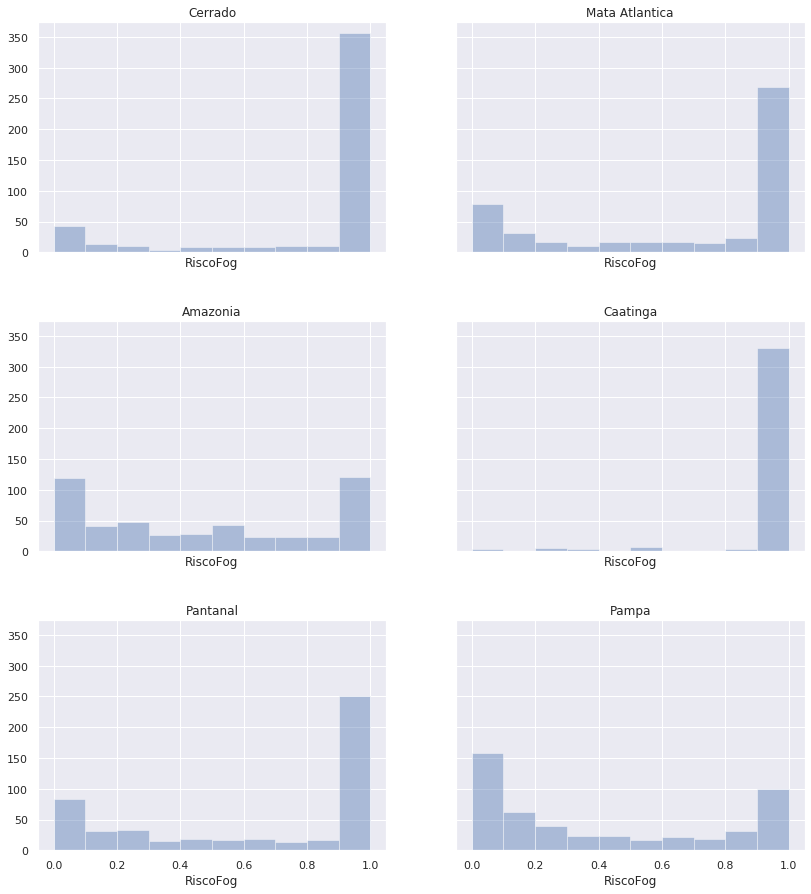

In [41]:
# Histogramas para cada região

from scipy import stats, integrate
sns.set(color_codes=True)

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2 , sharex=True, sharey=True)
ax = [ax1, ax2, ax3, ax4, ax5, ax6]

for i in range(0, 6):
    sns.distplot(dados_biomas[dados_biomas['Bioma']==biomas[i]]["RiscoFog"], ax=ax[i], kde=False, rug=False, bins=10);
    ax[i].set_title(biomas[i])

plt.subplots_adjust(hspace=0.3, top=3, right=1.9)

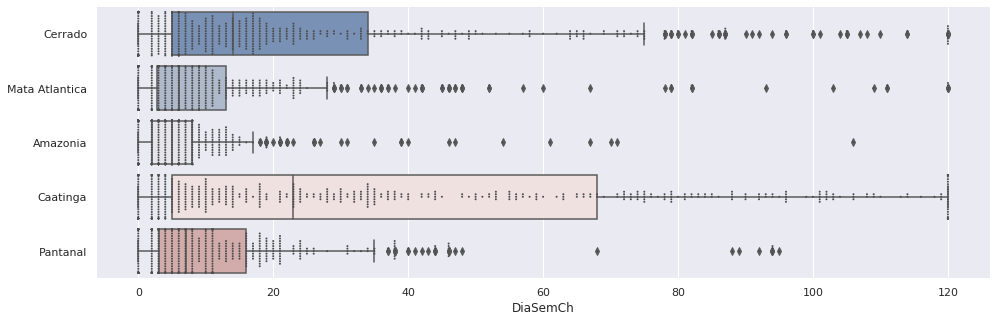

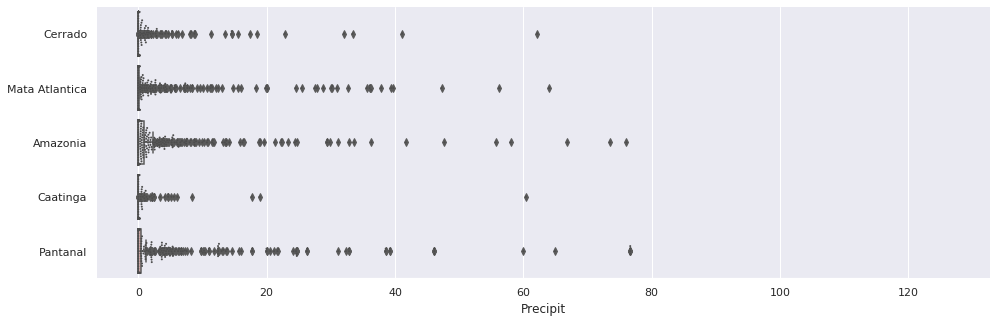

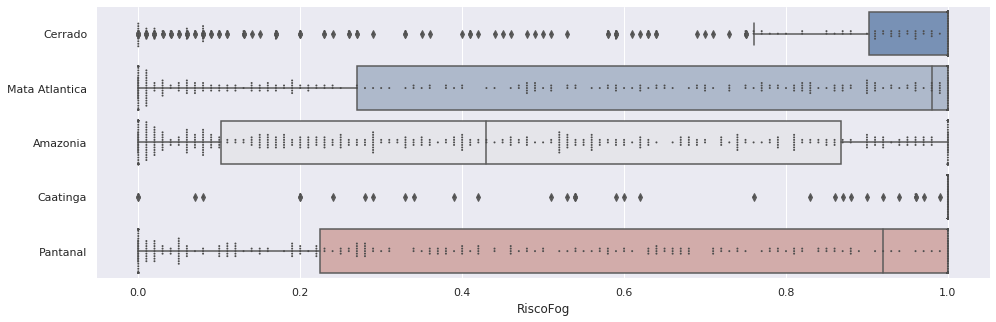

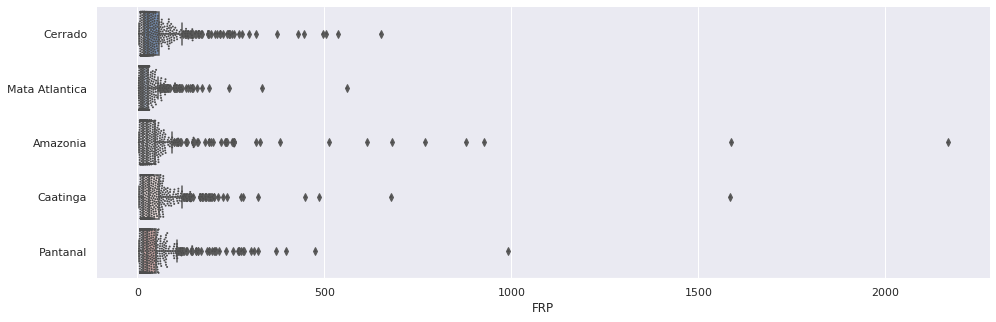

In [42]:
# Gerando boxplot para (risco, temperatura, precipitação, umidade) por bioma

for var in ["DiaSemCh", "Precipit", "RiscoFog", "FRP"]:
    fig, ax = plt.subplots(figsize=fig_size)
    sns.boxplot(ax=ax, x=var, y="Bioma", data=dados_biomas, palette="vlag")
    sns.swarmplot(x=var, y="Bioma", data=dados_biomas, size=2, color=".3", linewidth=0)
    ax.xaxis.grid(True)
    ax.set(ylabel="")
    sns.despine(trim=True, left=True)
    ax.set_ylim(4.5, -0.5)

In [43]:
dados['DataHora'] = pd.to_datetime(dados['DataHora'])  


/home/vconrado/anaconda3/envs/hackathon/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
# sns.distplot(dados["DataHora"], kde=False, rug=False, bins=10);


In [45]:
dados["estacao"].unique()

array(['verao'], dtype=object)

In [46]:
# Pegando dados por estacao

d = []
for r in dados["estacao"].unique():
    d.append(dados[dados["estacao"] == r].sample(N,random_state=1))
dados_estacao = pd.concat(d)

In [47]:
dados_estacao.groupby("estacao").size()

estacao
verao    500
dtype: int64

In [48]:
# Contado por grupo de risco e por estação
dados_estacao.filter(items=["RiscoFog", "estacao"])\
     .groupby(["estacao",pd.cut(dados_estacao["RiscoFog"], np.arange(0, 1+.25, .25))])\
     .count().rename(columns={'RiscoFog':'Total'})

Total
estacao RiscoFog          
verao   (0.0, 0.25]     81
        (0.25, 0.5]     56
        (0.5, 0.75]     53
        (0.75, 1.0]    253

(4.5, -0.5)

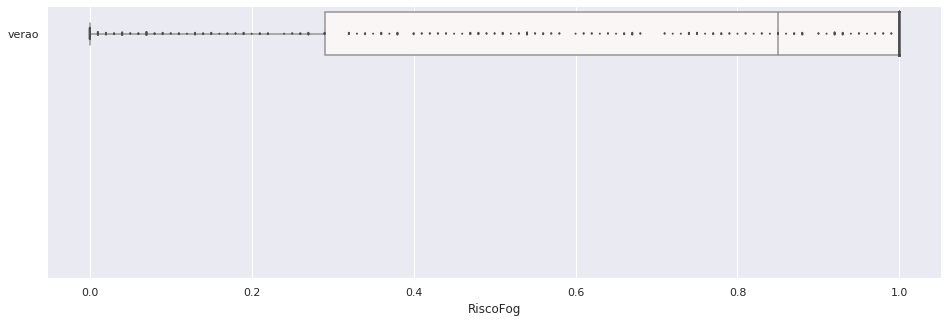

In [49]:
# Boxplot para Estação-Risco
fig, ax = plt.subplots(figsize=fig_size)
sns.boxplot(ax=ax, x="RiscoFog", y="estacao", data=dados_estacao, palette="vlag")
sns.swarmplot(x="RiscoFog", y="estacao", data=dados_estacao, size=2, color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
ax.set_ylim(4.5, -0.5)

In [50]:
# Ocorrências por Bioma-Estação

estacao_bioma=pd.DataFrame(index=dados_estacao['Bioma'].unique())
for estacao in ("primavera", "verao", "outono", "inverno"): 
    for bioma in dados_estacao['Bioma'].unique():
        #estacao_bioma.set_value(bioma,estacao, len(dados.loc[ (dados['estacao']==estacao) & (dados['bioma']==bioma)]))
        estacao_bioma.loc[bioma, estacao] = len(dados_estacao.loc[ (dados_estacao['estacao']==estacao) & (dados_estacao['Bioma']==bioma)])


(5, 0)

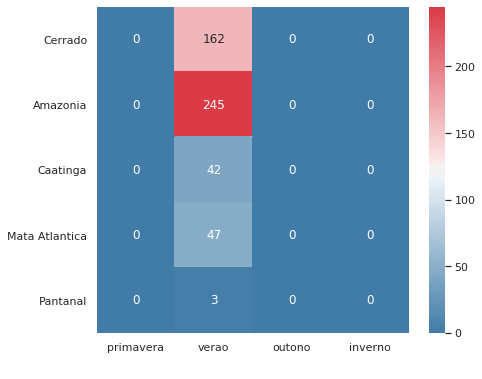

In [51]:
f, ax = plt.subplots(figsize=(7, 6))        
sns.heatmap(estacao_bioma, cmap=palette, annot=True, fmt='g', ax=ax)
ax.set_ylim(5, 0)